<a href="https://colab.research.google.com/github/Anagha-012/30-Days-Of-JavaScript/blob/master/asses2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
(TrainIn, TrainOut), (TestIn, TestOut) = datasets.mnist.load_data()
TrainIn = TrainIn.reshape(60000,28,28,1)
TestIn = TestIn.reshape(10000,28,28,1)
TrainOut = to_categorical(TrainOut)
TestOut = to_categorical(TestOut)


In [12]:
Samkhya = Sequential()
# Add Flatten/Dense Layers
Samkhya.add(Flatten(name='F1'))
Samkhya.add(Dense(100, activation='softmax',name='D1'))
Samkhya.add(Dense(100, activation='softmax',name='D2'))
Samkhya.add(Dense(10, activation='softmax',name='D3'))
Samkhya.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
TrainingLog=Samkhya.fit(TrainIn, TrainOut,epochs=10, validation_split=0.1)
test_loss, test_acc = Samkhya.evaluate(TestIn, TestOut)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1004 - loss: 0.0900 - val_accuracy: 0.1045 - val_loss: 0.0900
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1043 - loss: 0.0900 - val_accuracy: 0.1045 - val_loss: 0.0900
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1036 - loss: 0.0900 - val_accuracy: 0.1045 - val_loss: 0.0900
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1037 - loss: 0.0900 - val_accuracy: 0.1045 - val_loss: 0.0900
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1010 - loss: 0.0900 - val_accuracy: 0.1045 - val_loss: 0.0900
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1042 - loss: 0.0900 - val_accuracy: 0.1045 - val_loss: 0.0900
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0973 - loss: 0.0900 - val_accuracy: 0.1050 - val_loss: 0.0900
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1123 - loss: 0.0900

In [9]:
#convolutional layers, which are important for extracting features from image data.
#Instead, it flattens the images directly, making learning less effective.
#The hidden layers use softmax activation, which should only be in the final layer
#ReLU would work better for learning patterns. The loss function is also incorrect—MSE is for regression
#while categorical crossentropy is better for classification. Additionally,
#the optimizer (SGD) is slow; using Adam or SGD with momentum would improve training speed.


(TrainIn, TrainOut), (TestIn, TestOut) = datasets.mnist.load_data()
TrainIn = TrainIn.reshape(60000, 28 * 28).astype('float32') / 255.0  # Normalize
TestIn = TestIn.reshape(10000, 28 * 28).astype('float32') / 255.0
TrainOut = to_categorical(TrainOut)
TestOut = to_categorical(TestOut)

In [10]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(28*28,), name='D1'),
    Dense(256, activation='relu', name='D2'),
    Dense(10, activation='softmax', name='Output')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
TrainingLog = model.fit(TrainIn, TrainOut, epochs=10, validation_split=0.1, batch_size=128)
test_loss, test_acc = model.evaluate(TestIn, TestOut)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8747 - loss: 0.4462 - val_accuracy: 0.9713 - val_loss: 0.0943
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9728 - loss: 0.0908 - val_accuracy: 0.9775 - val_loss: 0.0721
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9838 - loss: 0.0523 - val_accuracy: 0.9788 - val_loss: 0.0697
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9878 - loss: 0.0378 - val_accuracy: 0.9757 - val_loss: 0.0894
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9910 - loss: 0.0289 - val_accuracy: 0.9800 - val_loss: 0.0713
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9931 - loss: 0.0215 - val_accuracy: 0.9772 - val_loss: 0.0940
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9942 - loss: 0.0177 - val_accuracy: 0.9793 - val_loss: 0.0863
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9961 - loss: 0.0124 - val_a

In [13]:
(TrainIn, TrainOut), (TestIn, TestOut) = datasets.mnist.load_data()
TrainIn = TrainIn.reshape(60000, 28 * 28).astype('float32') / 255.0  # Normalize
TestIn = TestIn.reshape(10000, 28 * 28).astype('float32') / 255.0
TrainOut = to_categorical(TrainOut)
TestOut = to_categorical(TestOut)

In [14]:
Samkhya = Sequential([
    Flatten(name='flatten'),
    Dense(256, activation='relu', name='hidden1'),
    Dense(128, activation='relu', name='hidden2'),
    Dense(64, activation='relu', name='hidden3'),
    Dense(10, activation='softmax', name='output')
])

In [15]:
Samkhya.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
TrainingLog = Samkhya.fit(TrainIn, TrainOut, epochs=20, batch_size=128, validation_split=0.1)
test_loss, test_acc = Samkhya.evaluate(TestIn, TestOut)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8349 - loss: 0.5652 - val_accuracy: 0.9682 - val_loss: 0.1134
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9649 - loss: 0.1186 - val_accuracy: 0.9755 - val_loss: 0.0870
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9790 - loss: 0.0709 - val_accuracy: 0.9768 - val_loss: 0.0799
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9840 - loss: 0.0514 - val_accuracy: 0.9787 - val_loss: 0.0768
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9872 - loss: 0.0391 - val_accuracy: 0.9750 - val_loss: 0.0917
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9904 - loss: 0.0298 - val_accuracy: 0.9793 - val_loss: 0.0800
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9925 - loss: 0.0247 - val_accuracy: 0.9792 - val_loss: 0.0873
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9943 - loss: 0.0173 - val_accuracy

In [5]:
Samkhya = Sequential()
# Add classification layer
Samkhya.add(Flatten(name='flatten'))
Samkhya.add(Dense(10, activation='sigmoid',name='dense1'))
Samkhya.add(Dense(10, activation='softmax',name='dense2'))
Samkhya.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
TrainingLog=Samkhya.fit(TrainIn, TrainOut,epochs=20, validation_split=0.1)
print(Samkhya.summary())

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.5043 - loss: 1.6442 - val_categorical_accuracy: 0.8232 - val_loss: 0.7851
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.7848 - loss: 0.7867 - val_categorical_accuracy: 0.8417 - val_loss: 0.5900
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.8123 - loss: 0.6515 - val_categorical_accuracy: 0.8453 - val_loss: 0.5118
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.8246 - loss: 0.5773 - val_categorical_accuracy: 0.8592 - val_loss: 0.4900
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - categorical_accuracy: 0.8236 - loss: 0.5802 - val_categorical_accuracy: 0.8470 - val_loss: 0.4986
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.8346 - loss: 0.5525 - val_categorical_accuracy: 0.8605 - val_loss: 0.4713
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accurac

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense1 (Dense)                       │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense2 (Dense)                       │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,882 (93.29 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,922 (62.20 KB)

None


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

Samkhya = Sequential([
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='hidden1'),  # Add a hidden layer for learning
    Dense(10, activation='softmax', name='output')  # Single classification layer
])

Samkhya.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

TrainingLog = Samkhya.fit(TrainIn, TrainOut, epochs=20, validation_split=0.1)

print(Samkhya.summary())


Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8198 - loss: 8.5021 - val_accuracy: 0.8953 - val_loss: 0.4348
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8978 - loss: 0.4692 - val_accuracy: 0.9180 - val_loss: 0.3463
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9186 - loss: 0.3244 - val_accuracy: 0.9418 - val_loss: 0.2514
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9361 - loss: 0.2509 - val_accuracy: 0.9452 - val_loss: 0.2339
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9397 - loss: 0.2413 - val_accuracy: 0.9493 - val_loss: 0.2047
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9468 - loss: 0.2133 - val_accuracy: 0.9488 - val_loss: 0.1931
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9484 - loss: 0.2016 - val_accuracy: 0.9483 - val_loss: 0.2165
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9534 - loss: 0.1

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden1 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

None


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted Label: 3


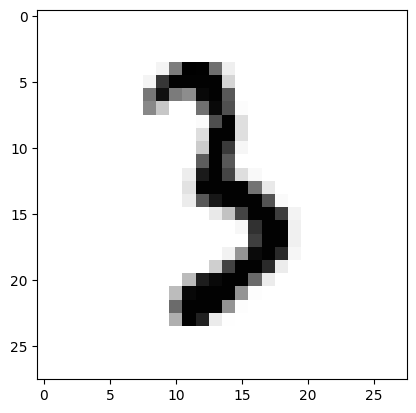

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Display Image
image_index = 44
plt.imshow(TestIn[image_index].reshape(28, 28), cmap='Greys')

# Corrected Prediction Shape
pred = Samkhya.predict(TestIn[image_index].reshape(1, 28, 28, 1))

print("Predicted Label:", np.argmax(pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Label: 9


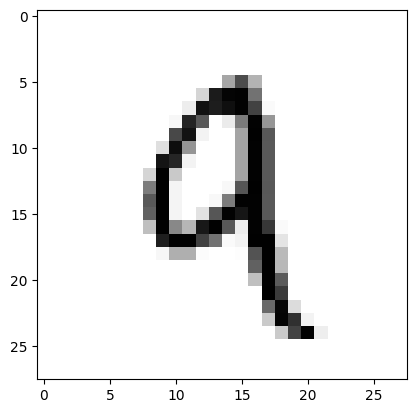

In [40]:
image_index = 125
plt.imshow(TestIn[image_index].reshape(28, 28), cmap='Greys')

# Corrected Prediction Shape
pred = Samkhya.predict(TestIn[image_index].reshape(1, 28, 28, 1))

print("Predicted Label:", np.argmax(pred))

In [36]:
predicted_classes1 = Samkhya.predict(TestIn)
predicted_classes1=tf.argmax(predicted_classes1,axis=1)
predicted_classes1

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_5_1/Cast:0", shape=(32, 28, 28, 1), dtype=float32). Expected shape (None, 784), but input has incompatible shape (32, 28, 28, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 28, 28, 1), dtype=uint8)
  • training=False
  • mask=None

In [41]:
predicted_classes1 = Samkhya.predict(TestIn)
predicted_classes1 = tf.argmax(predicted_classes1, axis=1).numpy()
print(predicted_classes1[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[7 2 1 0 4 1 4 9 6 9]


              precision    recall  f1-score   support

        Zero       0.98      0.97      0.98       980
         One       0.98      0.98      0.98      1135
         Two       0.98      0.92      0.95      1032
       Three       0.96      0.92      0.94      1010
        Four       0.97      0.95      0.96       982
        Five       0.92      0.95      0.93       892
         Six       0.95      0.97      0.96       958
       Seven       0.97      0.95      0.96      1028
       Eight       0.86      0.95      0.90       974
        Nine       0.94      0.94      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



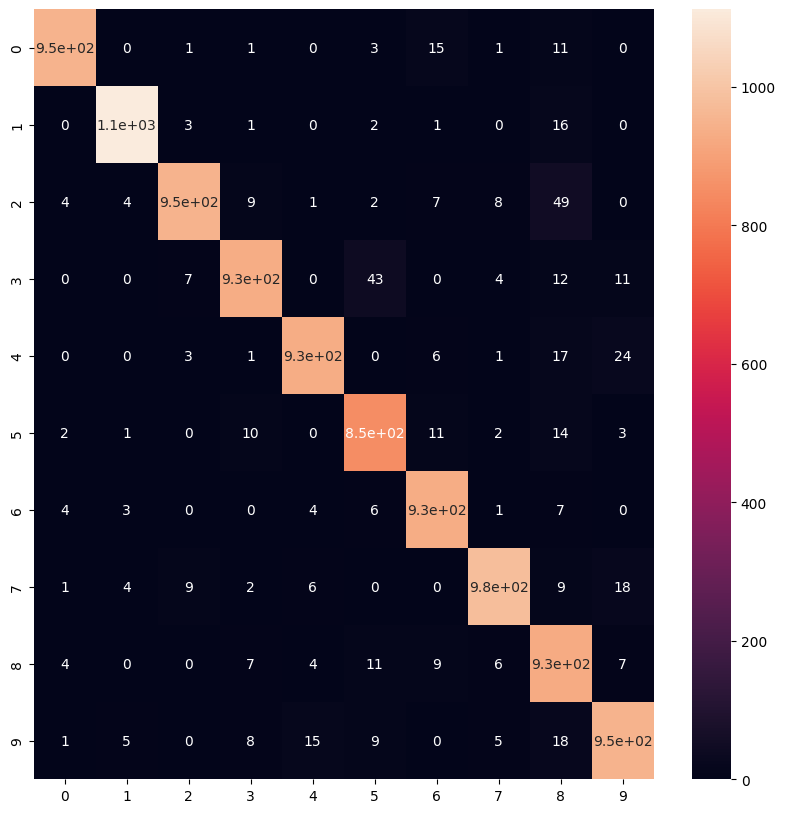

In [43]:
actual1 = tf.argmax(TestOut,axis=1)
actual1
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
cm = confusion_matrix(actual1, predicted_classes1)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)
Classes = ["Zero","One","Two","Three","Four", "Five", "Six", "Seven", "Eight", "Nine"]
print(classification_report(actual1, predicted_classes1, target_names=Classes))

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Samkhya1 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), name='c1'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', name='c2'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(name='F1'),
    Dense(128, activation='relu', name='D1'),  # Added fully connected layer
    Dense(10, activation='softmax', name='output')
])

Samkhya1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(Samkhya1.summary())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ c1 (Conv2D)                          │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ c2 (Conv2D)                          │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ F1 (Flatten)                         │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ D1 (Dense)                           │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.7999 - loss: 2.5501 - val_accuracy: 0.9767 - val_loss: 0.0879
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 50s 120ms/step - accuracy: 0.9800 - loss: 0.0619 - val_accuracy: 0.9837 - val_loss: 0.0563
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 56s 133ms/step - accuracy: 0.9873 - loss: 0.0399 - val_accuracy: 0.9833 - val_loss: 0.0576
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 76s 120ms/step - accuracy: 0.9912 - loss: 0.0263 - val_accuracy: 0.9855 - val_loss: 0.0590
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 121ms/step - accuracy: 0.9931 - loss: 0.0212 - val_accuracy: 0.9852 - val_loss: 0.0560
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 75s 105ms/step - accuracy: 0.9939 - loss: 0.0185 - val_accuracy: 0.9862 - val_loss: 0.0524
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 100ms/step - accuracy: 0.9949 - loss: 0.0136 - val_accuracy: 0.9875 - val_loss: 0.0593
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 103ms/step - accuracy: 0.9947 - loss: 0

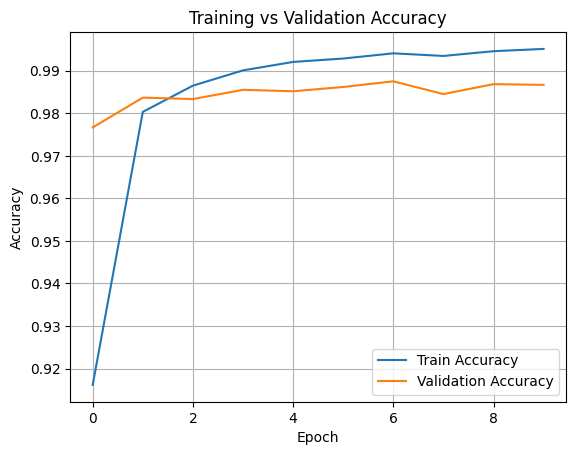

In [46]:
TrainingLog = Samkhya1.fit(TrainIn, TrainOut, epochs=10, validation_split=0.1, batch_size=128)

plt.plot(TrainingLog.history['accuracy'], label='Train Accuracy')
plt.plot(TrainingLog.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [47]:
#testing digit rec
[Socre0,Score1]=Samkhya1.evaluate(TestIn, TestOut)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9806 - loss: 0.0828


In [55]:
print(f"The confidence score is {Score1 * 100:.2f}%")


The confidence score is 98.59%


The Samkhya predicted is 0


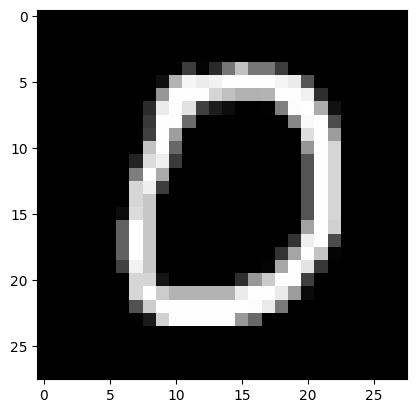

In [56]:
import matplotlib.pyplot as plt

plt.imshow(TestIn[10].reshape(28, 28), cmap='gray')

pred = Samkhya1.predict(TestIn[10].reshape(1, 28, 28, 1), verbose=0)  # Added `verbose=0` to suppress output
print("The Samkhya predicted is", pred.argmax())


In [57]:
predicted_classes = Samkhya1.predict(TestIn, verbose=0)  # Suppress logs
predicted_classes = tf.argmax(predicted_classes, axis=1)
print(predicted_classes.numpy())  # Convert to NumPy array if needed


[7 2 1 ... 4 5 6]


In [58]:
actual = tf.argmax(TestOut, axis=1)
print(actual.numpy())  # Convert TensorFlow tensor to a NumPy array if needed


[7 2 1 ... 4 5 6]


              precision    recall  f1-score   support

        Zero       0.97      1.00      0.98       980
         One       0.99      1.00      0.99      1135
         Two       0.99      0.99      0.99      1032
       Three       0.98      1.00      0.99      1010
        Four       0.99      0.98      0.98       982
        Five       0.99      0.98      0.98       892
         Six       0.99      0.98      0.99       958
       Seven       0.99      0.99      0.99      1028
       Eight       0.99      0.97      0.98       974
        Nine       0.97      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



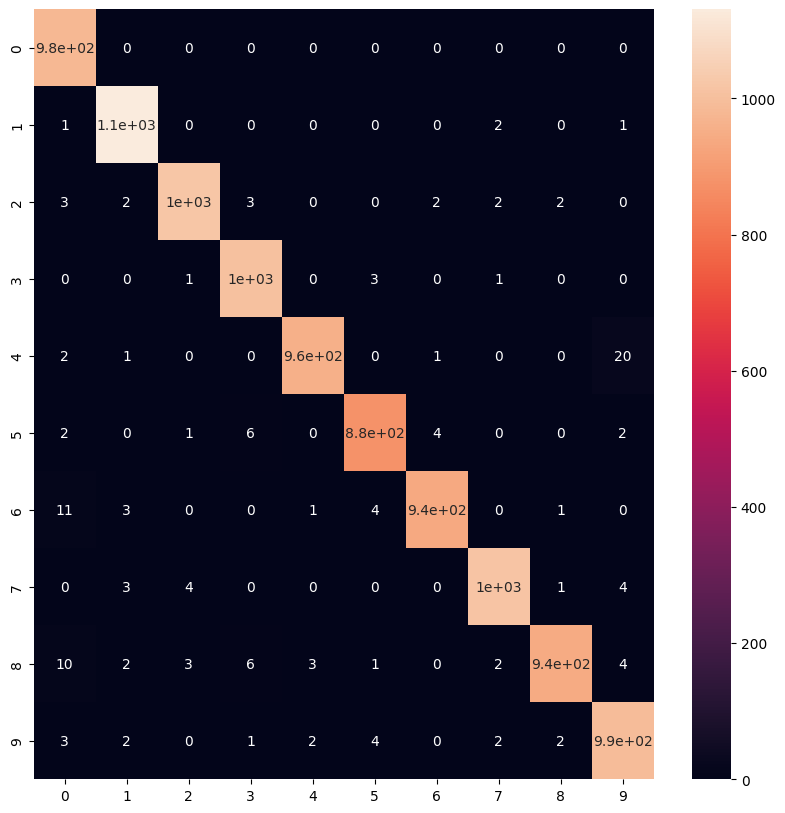

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
cm = confusion_matrix(actual, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)
Classes = ["Zero","One","Two","Three","Four", "Five", "Six", "Seven", "Eight", "Nine"]
print(classification_report(actual, predicted_classes, target_names=Classes))


In [53]:
import PIL
from PIL import ImageEnhance , ImageOps
from tensorflow.keras.preprocessing.image import img_to_array

In [66]:
import PIL
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

image_path = r"C:\Users\r_ana\OneDrive\Desktop\stinkbug.webp"

aksharam = PIL.Image.open(image_path)
plt.imshow(aksharam)
plt.axis("off")
plt.show()

aksharam1 = ImageOps.grayscale(aksharam)
plt.imshow(aksharam1, cmap='gray')
plt.axis("off")
plt.show()

newsize = (28, 28)
aksharam2 = aksharam1.resize(newsize)
plt.imshow(aksharam2, cmap='gray')
plt.axis("off")
plt.show()

aksharam3 = img_to_array(aksharam2)
aksharam3 = aksharam3.reshape(1, 28, 28, 1) / 255.0  # Normalize

predictions = Samkhya.predict(aksharam3)
print("The Samkhya predicted is", predictions.argmax())


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\r_ana\\OneDrive\\Desktop\\stinkbug.webp'

In [67]:
import os
from PIL import Image  # Import correctly
import matplotlib.pyplot as plt

image_path = r"C:\Users\r_ana\OneDrive\Desktop\hummingbird-2139279_640.jpg"

if os.path.exists(image_path):
    aksharam = Image.open(image_path)
    plt.imshow(aksharam)
    plt.axis("off")  # Hide axes
    plt.show()
else:
    print("Error: File not found at", image_path)


Error: File not found at C:\Users\r_ana\OneDrive\Desktop\hummingbird-2139279_640.jpg


In [68]:
aksharam1 = ImageOps.grayscale(aksharam)
plt.imshow(aksharam1,cmap='gray')
newsize = (28, 28)
aksharam2=aksharam1.resize(newsize)
plt.imshow(aksharam2,cmap='gray')
aksharam2.size


NameError: name 'aksharam' is not defined

In [69]:
aksharam3= img_to_array(aksharam2)
aksharam3= aksharam3.reshape(1, 28, 28, 1)
predictions = Samkhya.predict(aksharam3)
print("The Samkhya predicted is",predictions.argmax())



NameError: name 'aksharam2' is not defined